Q 1) How would you define most powerful superhero from the information available in
dataset?
a. Who is the most powerful superhero from each creator?

In [ ]:
import pandas as pd
import numpy as np

# Sample data including missing values
data = pd.read_csv('superheroes_nlp_dataset.csv')

df = pd.DataFrame(data)

# Handling missing values
df.fillna({'powers_text': '', 'creator': np.nan}, inplace=True)
df['superpowers'].fillna(value=pd.Series([[]]), inplace=True)

# Convert overall_score to numeric data type
df['overall_score'] = pd.to_numeric(df['overall_score'], errors='coerce')

# Drop rows with NaN values in 'creator'
df.dropna(subset=['creator'], inplace=True)


# Identify the most powerful superhero overall
df['overall_power'] = df['overall_score']

# Check count of NaN values in 'creator' column|

nan_count = df['creator'].isna().sum()
print(f"Number of NaN values in 'creator' column: {nan_count}")


Number of NaN values in 'creator' column: 0


In [ ]:
most_powerful_superhero = df.loc[df['overall_power'].idxmax()]

print("Most powerful superhero overall:")
MSP=pd.DataFrame(most_powerful_superhero)
print(MSP)   #MSP=most_powerful_superhero

Most powerful superhero overall:
                                                                  538
name                                                 Great Evil Beast
real_name                                          The Great Darkness
full_name                                                         NaN
overall_score                                                   237.0
history_text        The Great Evil Beast was formed when God utter...
...                                                               ...
has_durability                                                    1.0
has_stamina                                                       0.0
has_agility                                                       1.0
has_super_strength                                                1.0
overall_power                                                   237.0

[82 rows x 1 columns]


In [ ]:
# Group superheroes by creator and find the most powerful superhero from each creator
grouped = df.groupby('creator')

In [ ]:
print("\nMost powerful superhero from each creator:")
for name, group in grouped:
    try:
        if not pd.isna(name):
            if not group.empty:
                most_powerful_from_creator = group.loc[group['overall_power'].idxmax()]
                print(f"Creator: {name}, Most powerful superhero: {most_powerful_from_creator['name']}")
    except Exception as e:
        print(f"Error occurred: {e}")


Most powerful superhero from each creator:
Creator: ABC Studios, Most powerful superhero: JJ Powell
Creator: Blizzard Entertainment, Most powerful superhero: A'dal
Creator: Capcom, Most powerful superhero: Asura
Creator: Cartoon Network, Most powerful superhero: Rick Sanchez
Creator: Clive Barker, Most powerful superhero: Pinhead
Creator: DC Comics, Most powerful superhero: Great Evil Beast
Creator: Dark Horse Comics, Most powerful superhero: Hellboy (Injustice 2)
Creator: Disney, Most powerful superhero: Maui
Creator: Dreamworks, Most powerful superhero: Jack Frost
Creator: George Lucas, Most powerful superhero: Darth Nihilus
Creator: George R. R. Martin, Most powerful superhero: Night King
Creator: Hanna-Barbera, Most powerful superhero: Birdman
Error occurred: nan
Creator: Hasbro, Most powerful superhero: Unicron
Creator: IDW Publishing, Most powerful superhero: Selene
Creator: Ian Fleming, Most powerful superhero: James Bond (Craig)
Creator: Icon Comics, Most powerful superhero: H

Q 2)Find the top 5 superpowers in descending order.

In [ ]:

# Assuming 'superpowers' is the column containing the superpowers information

# Extract the superpowers from the DataFrame and create a list
superpowers_list = data['superpowers'].tolist()

# Concatenate all the superpowers into a single list
all_superpowers = []
for powers in superpowers_list:
    all_superpowers.extend(powers.split(','))

# Create a pandas Series from the list of superpowers
superpowers_series = pd.Series(all_superpowers)

# Get the top 5 superpowers in descending order
top_superpowers = superpowers_series.value_counts().head(5)

# Display the top 5 superpowers
print(top_superpowers)

 'Stamina'           729
 'Durability'        614
 'Reflexes'          588
 'Intelligence'      565
 'Super Strength'    561
dtype: int64


Q 3) Which race has the most immortal superheroes?

In [ ]:
!pip install matplotlib

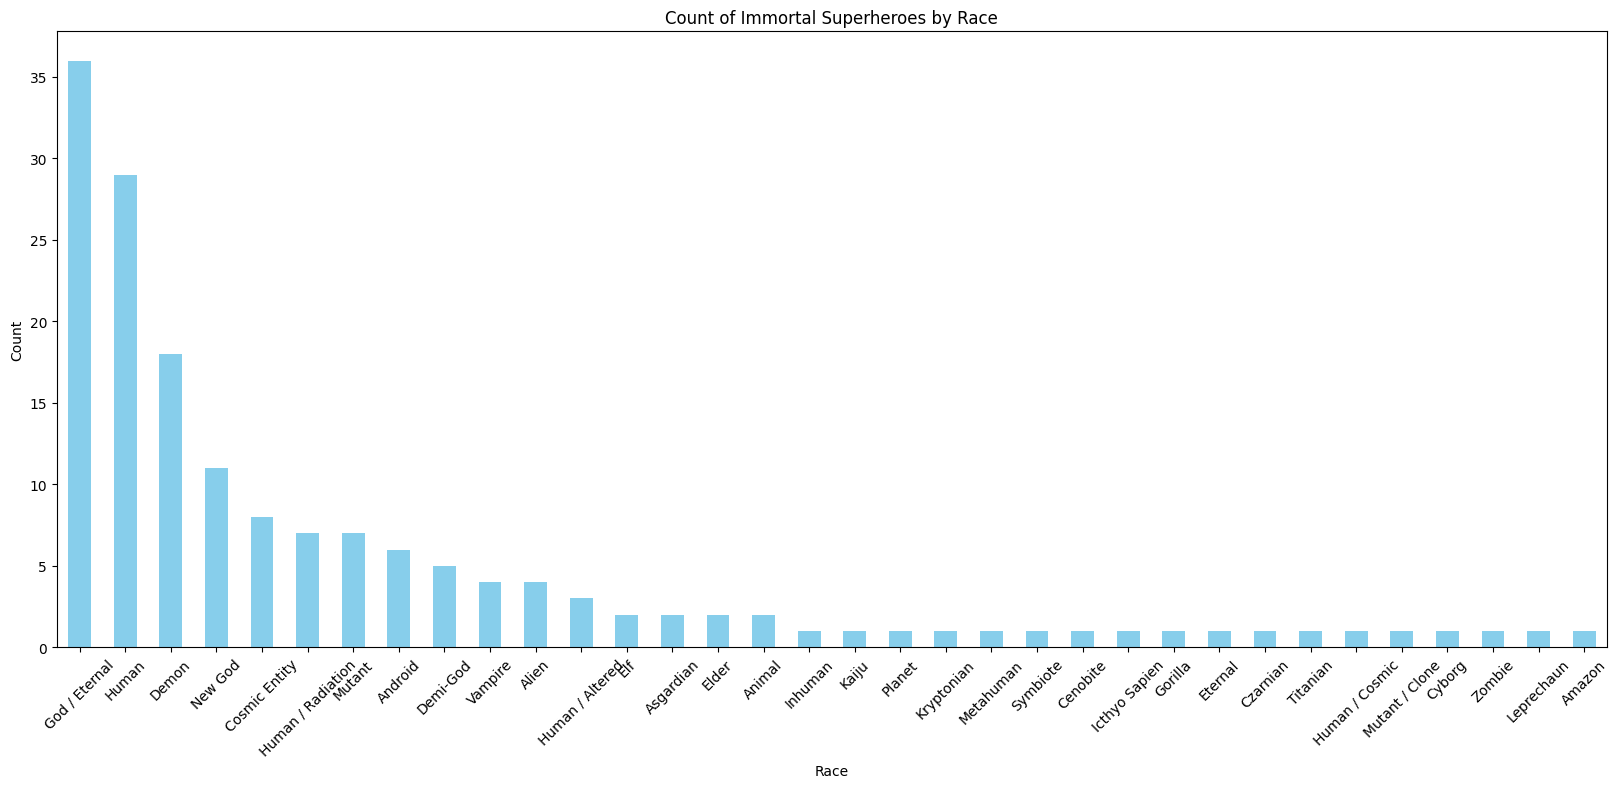

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset to include only immortal superheroes
immortal_superheroes = data[data['has_immortality'] == 1]

# Count the number of immortal superheroes for each race
immortal_race_counts = immortal_superheroes['type_race'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(20, 8))
immortal_race_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Immortal Superheroes by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Q 4)Name the creator having most superheroes of type “Parademon”.

In [ ]:
# Filter the dataset to include only superheroes of type "Parademon"
parademon_superheroes = data[data['type_race'] == 'Parademon']

# Find the creator with the most superheroes of type "Parademon"
creator_with_most_parademons = parademon_superheroes['creator'].value_counts().idxmax()

# Display the result
print(f"The creator with the most superheroes of type 'Parademon' is: {creator_with_most_parademons}")

The creator with the most superheroes of type 'Parademon' is: DC Comics


Q 5)Which comic creator has most superhero teams?
   a. Find names, real names and alias of superhero who is part of most teams.
   b. Are there any crossovers between creators and teams?

In [ ]:
# Find the comic creator with the most superhero teams
creator_with_most_teams = data['creator'].value_counts().idxmax()

# Display the comic creator with the most superhero teams
print(f"The comic creator with the most superhero teams is: {creator_with_most_teams}")

The comic creator with the most superhero teams is: Marvel Comics


In [ ]:
# Filter the dataset for the superhero with the most team affiliations
superhero_most_teams = data[data['teams'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0) == data['teams'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0).max()]
# Display the names, real names, and aliases of the superhero who is part of the most teams
print(superhero_most_teams[['name', 'real_name', 'aliases']])


           name real_name                                            aliases
1415  Wolverine     Logan  ['Weapon X, Weapon Ten, Death, Mutate 9601, Ji...


In [ ]:
# Check for crossovers between creators and teams
crossovers = data[data.duplicated(subset=['creator', 'teams'], keep=False)]

# Display any crossovers between creators and teams
if not crossovers.empty:
    print("There are crossovers between creators and teams.")
    print(crossovers[['creator', 'teams']])
else:
    print("There are no crossovers between creators and teams.")


There are crossovers between creators and teams.
                creator                                           teams
1             DC Comics                                              []
4             DC Comics                                              []
5          George Lucas                                  ['Jedi Order']
6     Dark Horse Comics  ['Bureau for Paranormal Research and Defense']
9             DC Comics                                              []
...                 ...                                             ...
1442      Marvel Comics                                              []
1443      Marvel Comics                                              []
1444                NaN                                              []
1446             Capcom                                              []
1447          DC Comics                                ['Flash Family']

[1075 rows x 2 columns]


Q 6) What are the characteristics that can predict a superhero alignment.

In [ ]:
# Print three different categorical values in the alignment column
print(df['alignment'].value_counts().head(3))

# Encoding the alignment column into numeric values
df['alignment'] = df['alignment'].astype('category')
df['alignment_cat'] = df['alignment'].cat.codes

# Printing the characteristics that can predict a superhero alignment
correlation_matrix = df.corr()
alignment_corr = correlation_matrix['alignment_cat'].sort_values(ascending=False)
print(alignment_corr)

Good       734
Bad        402
Neutral    103
Name: alignment, dtype: int64
alignment_cat                       1.000000
alignment_encoded                   0.233198
has_agility                         0.151423
has_stealth                         0.127708
has_dexterity                       0.125878
has_reflexes                        0.118482
has_marksmanship                    0.108995
has_enhanced_senses                 0.101296
has_stamina                         0.093725
has_enhanced_hearing                0.093634
has_shapeshifting                   0.076531
has_energy_constructs               0.075311
has_super_speed                     0.073839
has_endurance                       0.068344
has_dimensional_travel              0.065465
speed_score                         0.061032
has_illusions                       0.060230
has_flight                          0.056255
has_accelerated_healing             0.052657
combat_score                        0.046591
has_force_fields         

<ipython-input-81-656d6628460c>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
!pip install seaborn

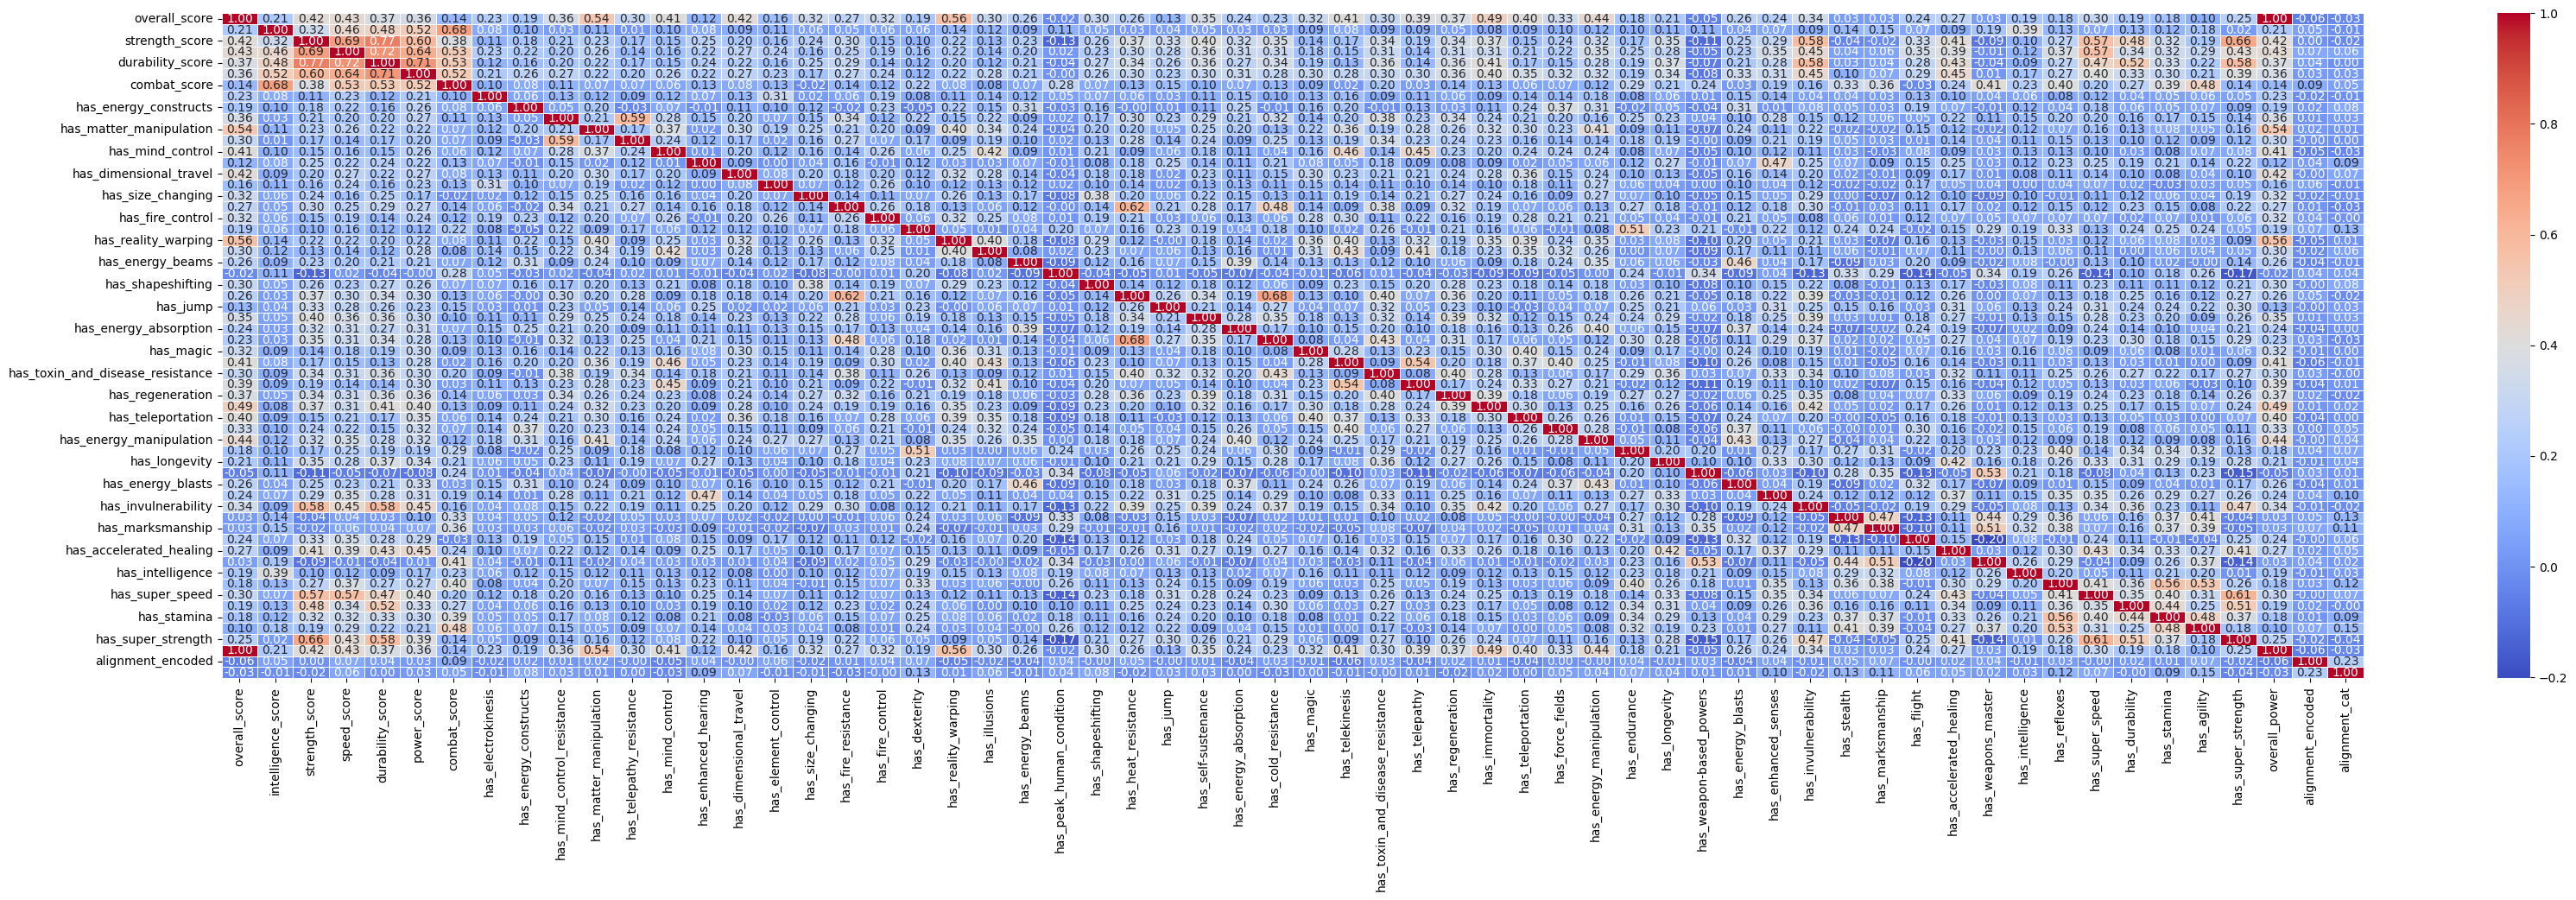

In [ ]:
# Visualizing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Q 7)From history of superheroes,
a. Find list of superheroes having negative past but now aligned positively.
(Negativity of past can be decided by multiple methods, please use which is
familiar to you)
b. Extract patterns from superhero history for each creator.


In [ ]:
!pip install spacy

In [ ]:
import pandas as pd

sub_df = df[['name', 'creator', 'history_text', 'alignment']]

    # Handling empty rows in history text and creator columns
sub_df['history_text'].fillna('', inplace=True)
sub_df['creator'].fillna('', inplace=True)

    # Extracting negative keywords from the sub-dataframe
negative_keywords = ['struggle', 'villain', 'enemy', 'crime', 'evil', 'battle', 'tragedy', 'loss', 'suffering']



<ipython-input-13-b60a906a0819>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['history_text'].fillna('', inplace=True)
<ipython-input-13-b60a906a0819>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['creator'].fillna('', inplace=True)


In [ ]:
 # Function to filter superheroes with a negative past but positive alignment
def filter_negative_positive(data):
    return data[(data['history_text'].str.lower().str.contains('|'.join(negative_keywords))) &
                    (data['alignment'] == 'Good')]

    # List of superheroes with a negative past but positive alignment
if 'alignment' in sub_df.columns:
    negative_positive_superheroes = filter_negative_positive(sub_df)
    print("List of superheroes having a negative past but now aligned positively:")
    print(negative_positive_superheroes[['name', 'alignment', 'history_text']])



List of superheroes having a negative past but now aligned positively:
              name alignment  \
2           A-Bomb      Good   
3               Aa      Good   
5     Aayla Secura      Good   
6       Abe Sapien      Good   
7         Abin Sur      Good   
...            ...       ...   
1438   Yo-yo (MCU)      Good   
1439          Yoda      Good   
1443         Yukio      Good   
1445       Zatanna      Good   
1446          Zero      Good   

                                           history_text  
2      Richard "Rick" Jones was orphaned at a young ...  
3     Aa is one of the more passive members of the P...  
5     ayla Secura was a Rutian Twi'lek Jedi Knight (...  
6      Sapien began life as Langdon Everett Caul, a ...  
7      Originally a history professor on the planet ...  
...                                                 ...  
1438  Elena "Yo-Yo" Rodriguez is a Colombian citizen...  
1439   Yoda was one of the most renowned and powerfu...  
1443  Little is known 

In [ ]:
 # Extracting patterns from superhero history for each creator
patterns_by_creator = sub_df.groupby('creator')['history_text'].apply(lambda x: ' '.join(x)).reset_index()

    # Display patterns from superhero history for each creator
print("Patterns from superhero history for each creator:")
print(patterns_by_creator)


Patterns from superhero history for each creator:
                   creator                                       history_text
0              ABC Studios  Daphne is a smart, pretty teenager with the lu...
1   Blizzard Entertainment  As with most of the naaru, little is known of ...
2                   Capcom   Dante is the central protagonist of the Devil...
3          Cartoon Network  Morty is the grandson of Rick Sanchez and his ...
4             Clive Barker  Emery Schaub was employed as a fry cook in Mor...
5                DC Comics  He was one of the many prisoners of Indian Hil...
6        Dark Horse Comics   Sapien began life as Langdon Everett Caul, a ...
7                   Disney  The son of Captain Edward Teague, Jack Sparrow...
8               Dreamworks  Before Jack Frost became an immortal being who...
9             George Lucas  ayla Secura was a Rutian Twi'lek Jedi Knight (...
10     George R. R. Martin  Arthur wielded the greatsword called Dawn as p...
11           H

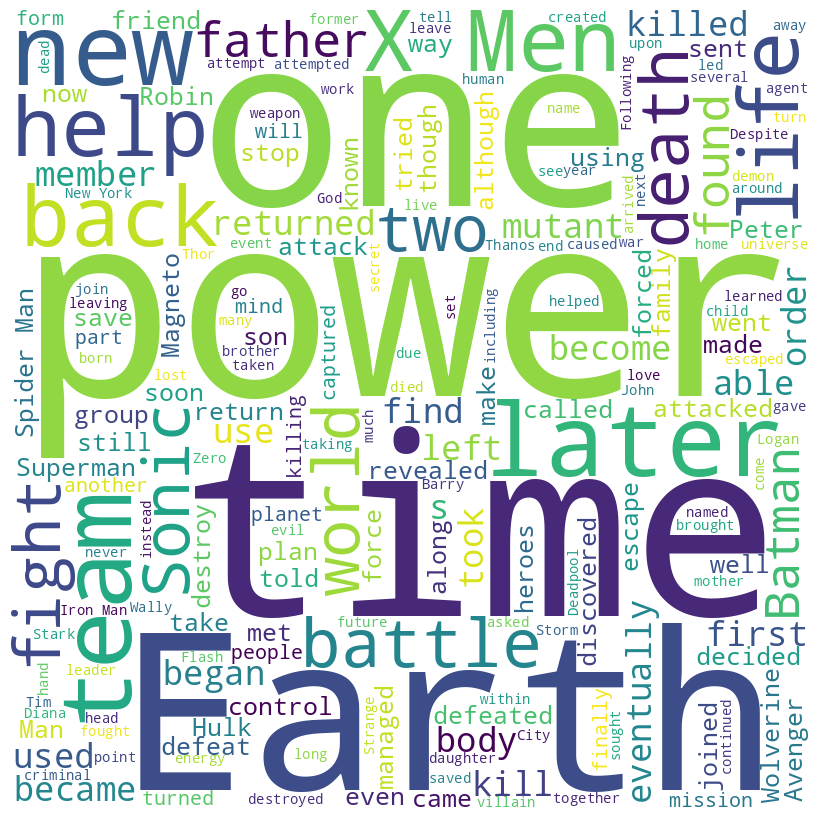

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming patterns_by_creator is a DataFrame containing the patterns extracted from the history of each creator

# Concatenate the history texts for each creator
patterns_text = patterns_by_creator['history_text'].str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(patterns_text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


Q 8)Report on the 10 superheroes with most relatives, status of those relatives where
possible, and the alignment of those superheroes.

In [ ]:
import spacy
import pandas as pd

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Creating a sub dataset with specified columns
sub_dataset = df[['name', 'relatives', 'alignment']]

# Handling missing values in the relatives column
sub_dataset['relatives'] = sub_dataset['relatives'].fillna('')

# Function to count the number of persons in the text using spaCy
def count_persons(text):
    doc = nlp(text)
    person_count = sum(1 for ent in doc.ents if ent.label_ == 'PERSON')
    return person_count

# Iterate over each row and count the number of persons in the relatives column
sub_dataset['relative_count'] = sub_dataset['relatives'].apply(count_persons)

# Sorting the dataset based on the number of relatives
sub_dataset_sorted = sub_dataset.sort_values('relative_count', ascending=False)

# List of the 10 superheroes with the most relatives
top_10_superheroes = sub_dataset_sorted[['name','alignment', 'relative_count','relatives']].head(10)

# Printing the list of the top 10 superheroes
print(top_10_superheroes.to_string(index=False))


<ipython-input-71-e24f9de7ad7b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataset['relatives'] = sub_dataset['relatives'].fillna('')


                      name alignment  relative_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

<ipython-input-71-e24f9de7ad7b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_dataset['relative_count'] = sub_dataset['relatives'].apply(count_persons)


Q 9)Find out any other interesting insights from given data.
    a. Which 3 comic characters can you recommend to your friends to read or watch?

In [ ]:
# Create a new DataFrame 'top_char' from 'data' and drop missing and non-numeric values
top_char = data.copy()
top_char.dropna(subset=['overall_score'], inplace=True)
top_char = top_char[pd.to_numeric(top_char['overall_score'], errors='coerce').notnull()]
top_char['overall_score'] = pd.to_numeric(top_char['overall_score'])

# Select only the 'name' and 'overall_score' columns
top_char = top_char[['name', 'overall_score']]

# Select the top 3 characters based on 'overall_score'
top_3_characters = top_char.nlargest(3, 'overall_score')

# Display the recommendations for comic characters
print("Recommendations for comic characters to read or watch:")
for index, row in top_3_characters.iterrows():
    print(f"Character Name: {row['name']}")
    print(f"Overall Score: {row['overall_score']}")
    print("-------------------------------")


Recommendations for comic characters to read or watch:
Character Name: Great Evil Beast
Overall Score: 237
-------------------------------
Character Name: Devilman
Overall Score: 229
-------------------------------
Character Name: Golden Ninja
Overall Score: 226
-------------------------------
